# Image classification of rotten and ringworm on tree trunks

Using keras and InceptionV3 as the model.

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

Download pretrained model on ImageNet.

In [2]:
base_model = InceptionV3(weights='imagenet', include_top=False)
img_width, img_height = 256, 256

batch_size = 64
train_data_dir = '/home/wangzhiqi/data/dataS_train'
validation_data_dir = '/home/wangzhiqi/data/dataS_test'

Add layers to do binary classification.

In [3]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- we have 2 classes
predictions = Dense(2, activation='softmax')(x)

In [4]:
model = Model(input=base_model.input, output=predictions)

Freeze the base model layers, and only train the added layer.

In [5]:
for layer in base_model.layers:
    layer.trainable = False


In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], )


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 863 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 108 images belonging to 2 classes.


In [10]:
nb_epochs= 30
history = model.fit_generator(
    train_generator,
    nb_epoch=nb_epochs,
    samples_per_epoch=863,
    nb_val_samples=108,
    validation_data=validation_generator)


Epoch 1/30
863/863 [==============================] - 173s - loss: 0.5446 - acc: 0.7891 - val_loss: 1.4465 - val_acc: 0.7963
Epoch 2/30
863/863 [==============================] - 169s - loss: 0.2431 - acc: 0.8969 - val_loss: 1.8477 - val_acc: 0.7963
Epoch 3/30
863/863 [==============================] - 162s - loss: 0.1774 - acc: 0.9270 - val_loss: 2.0154 - val_acc: 0.7593
Epoch 4/30
863/863 [==============================] - 164s - loss: 0.1645 - acc: 0.9363 - val_loss: 1.2296 - val_acc: 0.8056
Epoch 5/30
863/863 [==============================] - 165s - loss: 0.1692 - acc: 0.9374 - val_loss: 0.9229 - val_acc: 0.8611
Epoch 6/30
863/863 [==============================] - 163s - loss: 0.1565 - acc: 0.9421 - val_loss: 0.8375 - val_acc: 0.8241
Epoch 7/30
863/863 [==============================] - 163s - loss: 0.1493 - acc: 0.9467 - val_loss: 0.8832 - val_acc: 0.8796
Epoch 8/30
863/863 [==============================] - 163s - loss: 0.1683 - acc: 0.9397 - val_loss: 0.2179 - val_acc: 0.9167


/usr/lib/pymodules/python2.7/matplotlib/__init__.py:1173: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Populating the interactive namespace from numpy and matplotlib


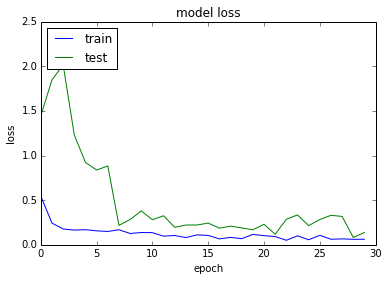

In [11]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
%pylab inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

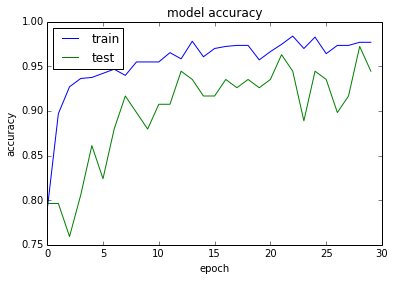

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
scoreSeg = model.evaluate_generator(validation_generator, 108)

# predict = model.predict_generator(validation_generator, 108)
print("Accuracy on validation data is " + np.array2string(scoreSeg[1]))

Accuracy on validation data is 0.93518518


In [15]:
print("Accuracy on validation data is " + np.array2string(scoreSeg[1]))

Accuracy on validation data is 0.93518518


{'rotten': 1, 'ringworm': 0}
/home/wangzhiqi/data/dataS_test/rotten/rotten0067.jpg is classified into class 1


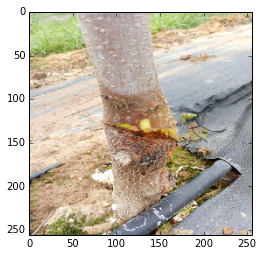

In [57]:
image_list = validation_data_dir
import glob
import numpy as np

print(validation_generator.class_indices)

filename1 = "/home/wangzhiqi/data/dataS_test/rotten/rotten0067.jpg"
img = image.load_img(filename1, target_size=(img_height, img_width))
x = image.img_to_array(img)
x = x / 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
print(filename1 + " is classified into class " + np.array2string(np.where(classes == np.max(classes))[1][0]))
plt.imshow(img)


# for filename in glob.glob(image_list + "/rotten/*"):
#     img = image.load_img(filename, target_size=(img_height, img_width))
#     x = image.img_to_array(img)
#     x = x / 255
#     x = np.expand_dims(x, axis=0)
#     images = np.vstack([x])
#     classes = model.predict(images)
#     print(filename1 + " is classified into class " + np.array2string(np.where(classes == np.max(classes))[1][0]))
    

/home/wangzhiqi/data/dataS_test/ringworm/ringworm0340.jpg is classified into class 0


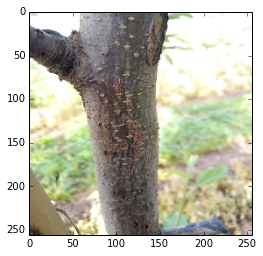

In [58]:
filename1 = "/home/wangzhiqi/data/dataS_test/ringworm/ringworm0340.jpg"
img = image.load_img(filename1, target_size=(img_height, img_width))
x = image.img_to_array(img)
x = x / 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
print(filename1 + " is classified into class " + np.array2string(np.where(classes == np.max(classes))[1][0]))
plt.imshow(img)

# for filename in glob.glob(image_list + "/ringworm/*"):
#     img = image.load_img(filename, target_size=(img_height, img_width))
#     x = image.img_to_array(img)
#     x = x / 255
#     x = np.expand_dims(x, axis=0)
#     images = np.vstack([x])
#     classes = model.predict(images)
#     print(filename + " is classified into class " + np.array2string(np.where(classes == np.max(classes))[1][0]))